# Building Raman databases

In [1]:
import sys
sys.path.append("C:\\Users\\User\\Vrije Universiteit Brussel\\Mehdi Feizpour - Halewijn's Thesis Project\\master thesis\\other")
sys.path.append("C:\\Users\\mfeizpou\\OneDrive - Vrije Universiteit Brussel\\Halewijn's Thesis Project\\master thesis\other")

import os
import uuid
import tkinter as tk
from tkinter import *
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import interact, widgets
from sklearn.preprocessing import MinMaxScaler
from renishawWiRE import WDFReader
import matplotlib.animation as animation
from scipy.signal import find_peaks
from adjustText import adjust_text  # Import ad
from PIL import Image
import matplotlib.ticker as ticker



# from renishawWiRE import WDFReader
# from renishawWiRE import export
import numpy as np



import importlib
import my_functions as mf
import filepaths as fp
import figure_label_names as fln
import color_maps as cm
import variables
import classes
mf = importlib.reload(mf)
fp = importlib.reload(fp)
cm = importlib.reload(cm)
variables = importlib.reload(variables)
classes = importlib.reload(classes)

In [2]:
def reload_libraries(): 
    import importlib
    import my_functions as mf
    import filepaths as fp
    import color_maps as cm
    import variables
    import classes
    mf = importlib.reload(mf)
    fp = importlib.reload(fp)
    cm = importlib.reload(cm)
    variables = importlib.reload(variables)
    classes = importlib.reload(classes)
    print('done')

## What are the measurements that we did? 

In [3]:
raman_studies = classes.RamanStudies(fp.raman_spectra_path, fp.raman_GUI_dataframe_path)
raman_studies.get_study_overview_list()

array([nan, 'first integration test', 'topas_measurement',
       'flushing with crystal violet over time study', 'test',
       'database_setup', 'mapping_experiment', 'first_bacterial_test',
       'second test on bacterial cultures', 'second_integration_test',
       'gradient_chamber_series_first_test',
       'cultured bacteria signal test', 'raman_enhancement_in_16ch_chip',
       't', 'TSA_reference_measurement'], dtype=object)

## choose a study

In [91]:
#choose a study and get the dataframes
study_name = 'database_setup'
raman_studies.open_study_dataframe(study_name)
raman_studies.get_study_dataframe(study_name)

,ID,study_name,experiment_name,date,strip,sample_name,repeating_measurement_nr,laser_wavelength,laser_power,objective used,...,remarks,objective_used,exposure_time [s],Unnamed: 0,id,Sample,exposure_time,gold_layer_thickness,voltage,frequency
0,a5832e62,database_setup,NaN,58:59.5,0.0,E coli,0,785,2.5,NaN,...,ecoli measurement map linefocus,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fcf8eccf,database_setup,NaN,07:02.1,0.0,pseudescherichia vulneris,0,785,2.5,NaN,...,vulneris measurement map linefocus,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,328e5e60,database_setup,NaN,46:47.4,0.0,pseudescherichia vulneris,0,785,2.5,NaN,...,epidermis measurement map linefocus,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,898f956e,database_setup,NaN,59:35.1,0.0,E coli,0,785,2.5,NaN,...,"this is the real e coli measurement, the previ...",20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,23eb4317,database_setup,NaN,2024-06-01 12:49:32.262226,0.0,pseudescherichia vulneris,0,785,2.5,NaN,...,new measurement of vulneris,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6c9a64c3,database_setup,NaN,2024-06-01 13:02:00.211220,0.0,E coli,0,785,2.5,NaN,...,measurement of e coli next to substrate,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f69da2a1,database_setup,NaN,2024-06-01 13:02:27.763586,0.0,pseudescherichia vulneris,0,785,2.5,NaN,...,measurement of vulneris next to substrate,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35e2f5c7,database_setup,NaN,2024-06-01 17:38:35.373343,0.0,staphylocooccus epidermis,0,785,2.5,NaN,...,measurement ofepidermis next to substrate,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8ed404cc,database_setup,NaN,2024-06-01 21:44:10.647303,0.0,E coli,0,785,2.5,NaN,...,long measurement of e coli,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3b81b0bb,database_setup,NaN,2024-06-01 21:45:19.560010,0.0,E coli,0,785,2.5,NaN,...,long measurement of vulneris,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## construct your database

In [88]:
#read in the database

In [49]:
filepath = fp.second_semester_data_processing_path + '/' + 'database_measurement_dataframes' +'/' + 'second_individual_measurement5.csv'
measurement_df = pd.read_csv(filepath)
measurement_df

,ID,Class,laser_power,objective used,on_substrate,remarks,exposure_time,repitition_number
0,44263ec1,E coli,2.5,NaN,ON,e coli first measurement,12,1
1,7190624c,pseudescherichia vulneris,5.0,NaN,ON,vulneris first measurement,30,1
2,7084594e,staphylocooccus epidermis,5.0,NaN,ON,epidermis first measurement,30,1
3,ee60467d,E coli,2.5,NaN,ON,epidermis first measurement repeated,12,2
4,44091d22,pseudescherichia vulneris,5.0,NaN,ON,vulneris repeated measurement,30,2


### Read in the database

In [61]:
preprocessing_params = {'window_length': 15, 
                            'polyorder':3, 
                       'normalization': False, 
                       'cosmic_ray_removal':False,
                       'cosmic_ray_z_score': 8}
df_array = []

for ii in range(measurement_df.shape[0]):
    ID = measurement_df.ID.values[ii]
    print(ID)
    Class = measurement_df.Class.values[ii]
    repitition_nr = measurement_df.repitition_number.values[ii]
    df = raman_studies.get_raman_measurement(ID,preprocessing = False, preprocessing_params=preprocessing_params).convert_wdf_to_csv()
    df.loc[:, 'Class'] = [Class]*ID_df.shape[0]
    df.loc[:, 'repitition_nr'] = [repitition_nr]*ID_df.shape[0]
    df_array += [df]

concat_df = pd.concat(df_array)

44263ec1
7190624c
7084594e
ee60467d
44091d22


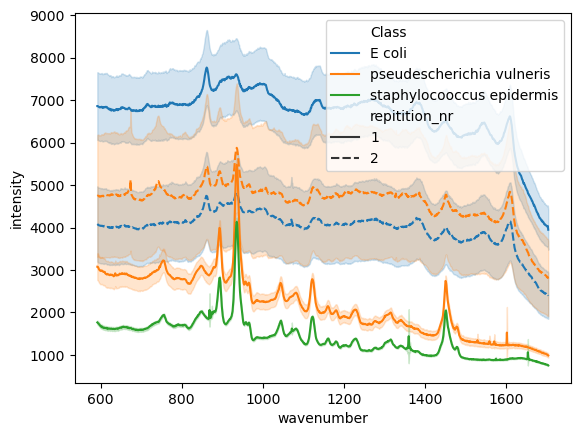

In [62]:
sns.lineplot(data = concat_df, x = 'wavenumber',y = 'intensity', hue = 'Class', style= 'repitition_nr', errorbar=('se',2))
plt.show()

a5832e62


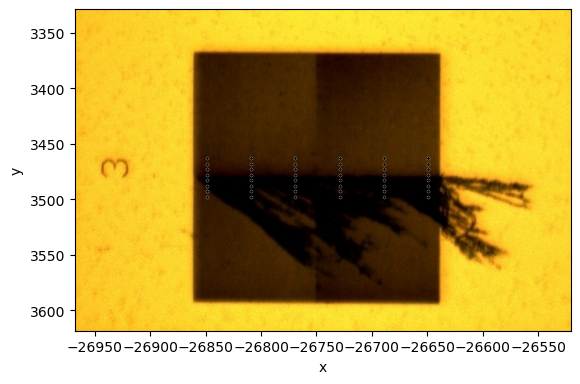

328e5e60


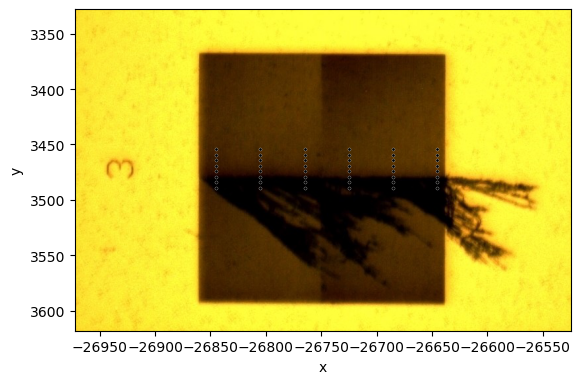

In [98]:
array =  ['a5832e62', '328e5e60']

df_array = []

for ii in range(len(array)):
    ID = array[ii]
    print(ID)
    raman_measurement = raman_studies.get_raman_measurement(ID,preprocessing = False, preprocessing_params=preprocessing_params)
    df = raman_measurement.convert_wdf_to_csv()
    raman_measurement.show_image()
    df.loc[:, 'number'] = [ii]*df.shape[0]
    df.loc[:, 'id'] = [ID]*df.shape[0]
    df_array += [df]

concat_df = pd.concat(df_array)

In [96]:
#choose a study and get the dataframes
study_name = 'database_setup'
#raman_studies.open_study_dataframe(study_name)
raman_studies.get_study_dataframe(study_name)

,ID,study_name,experiment_name,date,strip,sample_name,repeating_measurement_nr,laser_wavelength,laser_power,objective used,...,remarks,objective_used,exposure_time [s],Unnamed: 0,id,Sample,exposure_time,gold_layer_thickness,voltage,frequency
0,a5832e62,database_setup,NaN,58:59.5,0.0,E coli,0,785,2.5,NaN,...,ecoli measurement map linefocus,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fcf8eccf,database_setup,NaN,07:02.1,0.0,pseudescherichia vulneris,0,785,2.5,NaN,...,vulneris measurement map linefocus,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,328e5e60,database_setup,NaN,46:47.4,0.0,pseudescherichia vulneris,0,785,2.5,NaN,...,epidermis measurement map linefocus,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,898f956e,database_setup,NaN,59:35.1,0.0,E coli,0,785,2.5,NaN,...,"this is the real e coli measurement, the previ...",20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,23eb4317,database_setup,NaN,2024-06-01 12:49:32.262226,0.0,pseudescherichia vulneris,0,785,2.5,NaN,...,new measurement of vulneris,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6c9a64c3,database_setup,NaN,2024-06-01 13:02:00.211220,0.0,E coli,0,785,2.5,NaN,...,measurement of e coli next to substrate,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f69da2a1,database_setup,NaN,2024-06-01 13:02:27.763586,0.0,pseudescherichia vulneris,0,785,2.5,NaN,...,measurement of vulneris next to substrate,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35e2f5c7,database_setup,NaN,2024-06-01 17:38:35.373343,0.0,staphylocooccus epidermis,0,785,2.5,NaN,...,measurement ofepidermis next to substrate,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8ed404cc,database_setup,NaN,2024-06-01 21:44:10.647303,0.0,E coli,0,785,2.5,NaN,...,long measurement of e coli,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3b81b0bb,database_setup,NaN,2024-06-01 21:45:19.560010,0.0,E coli,0,785,2.5,NaN,...,long measurement of vulneris,20xL,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


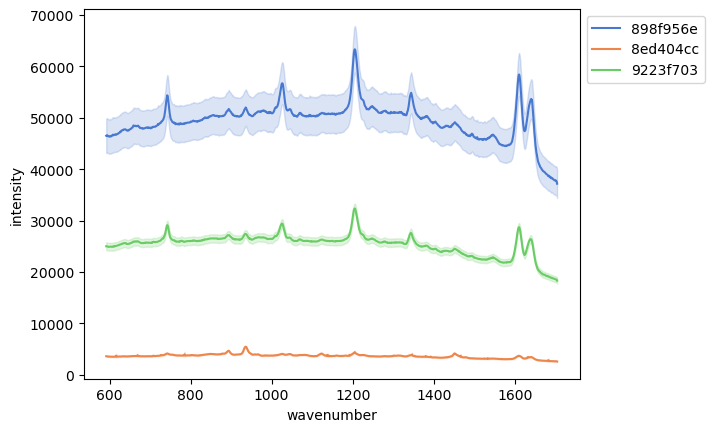

In [93]:
sns.lineplot(data = concat_df, x = 'wavenumber',y = 'intensity', hue = 'id', errorbar=('se',2), palette='muted')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))